<a href="https://colab.research.google.com/github/vasu-rguktn/Team_X/blob/main/Electricityload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip electricityloaddiagrams20112014.zip

Archive:  electricityloaddiagrams20112014.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of electricityloaddiagrams20112014.zip or
        electricityloaddiagrams20112014.zip.zip, and cannot find electricityloaddiagrams20112014.zip.ZIP, period.


In [11]:
import os

os.listdir("/content")



['.config', 'electricityloaddiagrams20112014.zip', 'data', 'sample_data']

In [14]:
import os

file_path = "/content/electricityloaddiagrams20112014.zip"
print("File exists:", os.path.exists(file_path))
print("File size (MB):", os.path.getsize(file_path) / (1024*1024))


File exists: True
File size (MB): 126.0


In [15]:
!file /content/electricityloaddiagrams20112014.zip


/content/electricityloaddiagrams20112014.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


In [16]:
import os

os.listdir("/content")



['.config', 'electricityloaddiagrams20112014.zip', 'data', 'sample_data']

In [17]:
import os
import zipfile

zip_path = "/content/electricityloaddiagrams20112014.zip"
extract_path = "/content/data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)



['LD2011_2014.txt', '__MACOSX']

In [29]:
print("Shape:", df.shape)
print("Columns:", df.columns[:5])
print("Missing values:", df.isna().sum().sum())



Shape: (140256, 371)
Columns: Index(['Unnamed: 0', 'MT_001', 'MT_002', 'MT_003', 'MT_004'], dtype='object')
Missing values: 0


In [31]:
df["timestamp"] = pd.to_datetime(df["Unnamed: 0"])
df = df.set_index("timestamp")
df = df.sort_index()

df.index.min(), df.index.max()

(Timestamp('2011-01-01 00:15:00'), Timestamp('2015-01-01 00:00:00'))

In [32]:
load = df.iloc[:, 0].copy()   # first consumer
load.name = "load_kwh"

load.describe()


,load_kwh
count,140256
unique,140256
top,2014-12-31 20:00:00
freq,1


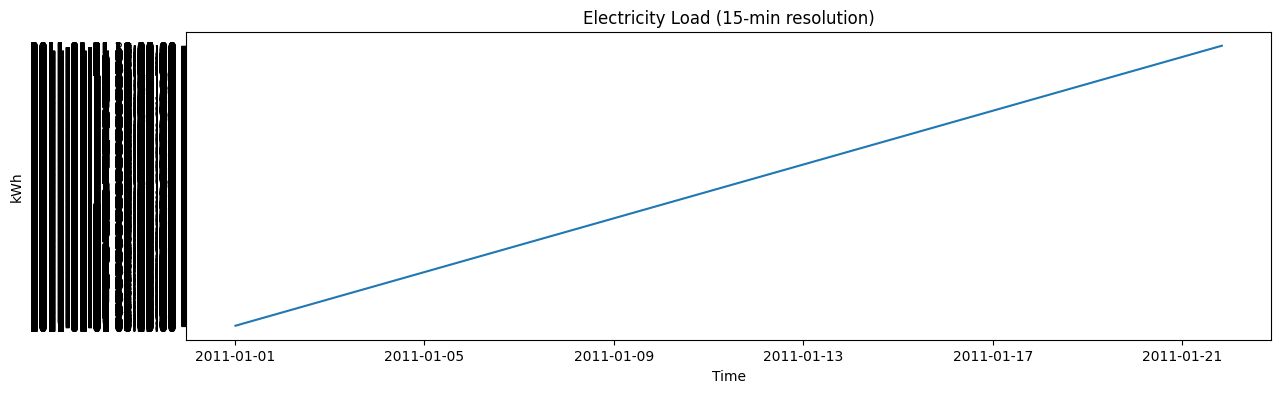

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(load[:2000])
plt.title("Electricity Load (15-min resolution)")
plt.ylabel("kWh")
plt.xlabel("Time")
plt.show()


In [34]:
load_hourly = load.resample("1H").sum()

load_hourly.describe()


/tmp/ipython-input-1248365121.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  load_hourly = load.resample("1H").sum()


,load_kwh
count,35065
unique,35065
top,2015-01-01 00:00:00
freq,1


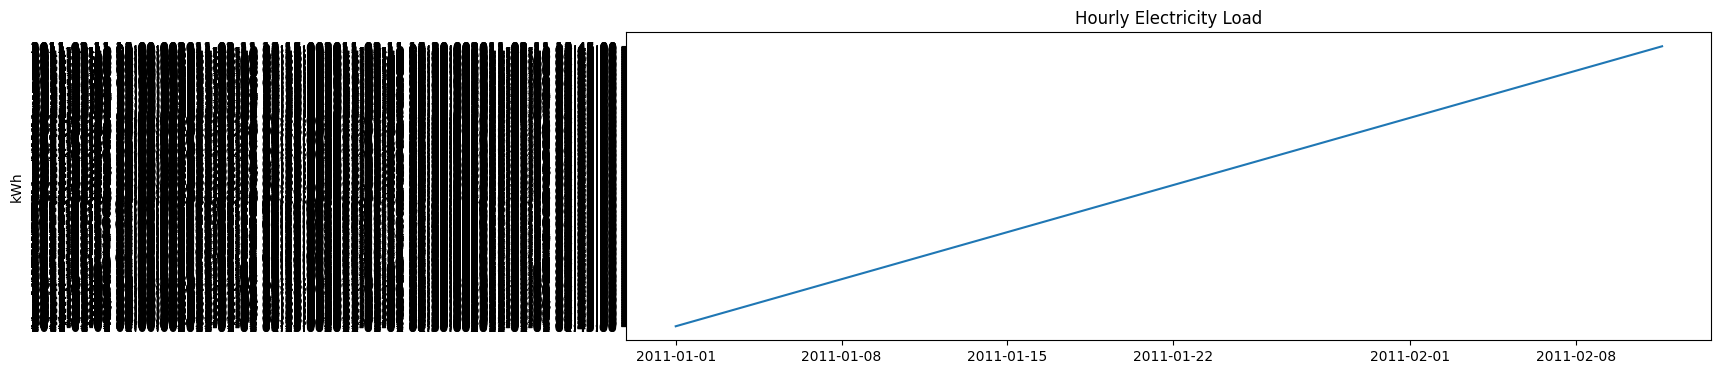

In [35]:
plt.figure(figsize=(14,4))
plt.plot(load_hourly[:1000])
plt.title("Hourly Electricity Load")
plt.ylabel("kWh")
plt.show()
